배깅 : 부스트랩 샘플링을 통한 분류 앙상블

In [2]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch07/figures/07_06.png', width=500)

알고리즘 동작방식

In [3]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch07/figures/07_07.png', width=800)

Wine 데이터셋의 샘플 분류

In [7]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
# 클래스 1  제외
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values

In [6]:
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=None, random_state=1)
bag = BaggingClassifier(estimator=tree, n_estimators=500,max_samples=1.0,max_features=1.0,
                        bootstrap=True,bootstrap_features=False)

In [13]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print(f"결정트리의 정확도 : {tree_train} {tree_test}")

bag.fit(X_train,y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train,y_train_pred)
bag_test = accuracy_score(y_test,y_test_pred)
print(f"베깅의 정확도 : {bag_train} {bag_test}")

결정트리의 정확도 : 1.0 0.8333333333333334
베깅의 정확도 : 1.0 0.9166666666666666


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train,y_train)
rf_test_score = rf.score(X_test,y_test)
print(f"랜덤포레스트 train   test  {rf_train_score} {rf_test_score}")


랜덤포레스트 train   test  1.0 0.9166666666666666


약한 학습기를 통한 에이다 부스트

In [15]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch07/figures/07_09.png', width=400)

사이킷런에서 에이다부스트 사용

In [17]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth = 1,
                              random_state=1
                              )
ada = AdaBoostClassifier(estimator=tree, n_estimators=500,learning_rate=0.1,random_state=1)

In [19]:
# 1. tree 학습하고 예측해서 정확도(훈련/검증)
# 2. 에이다부스트 학습하고 예측해서 정확도(훈련/검증)
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print(f"결정트리의 정확도 : {tree_train} {tree_test}")

ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train,y_train_pred)
ada_test = accuracy_score(y_test,y_test_pred)
print(f"ada 정확도 : {ada_train} {ada_test}")

결정트리의 정확도 : 1.0 0.9166666666666666
ada 정확도 : 1.0 0.9166666666666666


그레이디언트 부스팅 - 손실 그레이디언트 기반의 앙상블 훈련
  - XGBoost

In [21]:
import xgboost as xgb

In [22]:
xgb.__version__

'2.0.3'

In [23]:
model = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=4, random_state=1, use_label_encoder=1)
gbm = model.fit(X_train,y_train)
y_train_pred =  gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

gbm_train = accuracy_score(y_train,y_train_pred)
gbm_test = accuracy_score(y_test,y_test_pred)
gbm_train,gbm_test


(0.968421052631579, 0.9166666666666666)

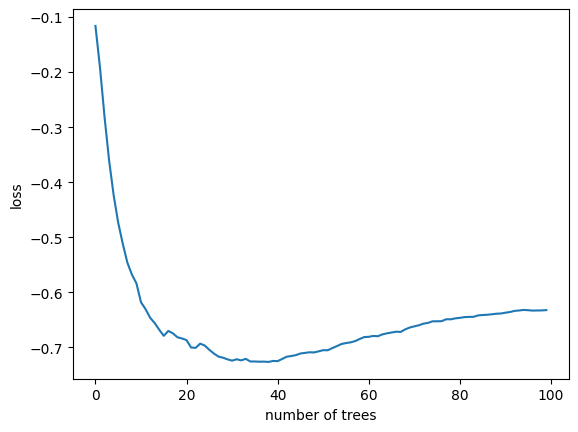

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

gbr = GradientBoostingClassifier(n_estimators = 100,
                                 subsample=0.5,
                                 random_state=1
                                 )
gbr.fit(X_train,y_train)
oob_loss = np.cumsum(-gbr.oob_improvement_)   # oob_improvement_ 손실을 양수로 표현
plt.plot(range(100),oob_loss)
plt.xlabel("number of trees")
plt.ylabel("loss")
plt.show()